In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [2]:
path = os.getcwd()
#heart_df = pd.read_csv('heart_disease_missing.csv')
heart_df = pd.read_csv(path+"\\Heart Disease\\train.csv")
heart_df.describe()
#heart_df_nona["cp"] = heart_df_nona.loc[:,"cp"].replace("Asympt.",0).replace("Atypical",1).replace("Non",2).replace("Typical",3)
#heart_df_nona["restecg"] = heart_df_nona.loc[:,"restecg"].replace("Normal",0).replace("ST-T wave",1).replace("LV hyper", 2)
#heart_df_nona["slope"] = heart_df_nona.loc[:,"slope"].replace("down",0).replace("flat",1).replace("up",2)
#heart_df_nona["thal"] = heart_df_nona.loc[:,"thal"].replace("Revers.",0).replace("Normal",1).replace("Fixed",2)


age         sex          cp    trestbps        chol         fbs  \
count  212.000000  212.000000  212.000000  205.000000  202.000000  212.000000   
mean    54.311321    0.688679    0.957547  131.784610  244.133256    0.132075   
std      9.145339    0.464130    1.022537   18.057222   46.444257    0.339374   
min     29.000000    0.000000    0.000000   93.944184  126.085811    0.000000   
25%     47.000000    0.000000    0.000000  119.968114  211.969594    0.000000   
50%     55.000000    1.000000    1.000000  130.010256  241.467023    0.000000   
75%     61.000000    1.000000    2.000000  139.965470  272.484222    0.000000   
max     77.000000    1.000000    3.000000  192.020200  406.932689    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  207.000000  208.000000  212.000000  200.000000  210.000000  212.000000   
mean     0.560386  149.647978    0.344340    1.113106    1.423810    0.731132   
std      0.535149   22.076206    0.476277    1.255908    0.623622    1.038762   
min      0.000000   88.032613    0.000000   -0.185668    0.000000    0.000000   
25%      0.000000  135.946808    0.000000    0.050778    1.000000    0.000000   
50%      1.000000  151.939216    0.000000    0.726060    1.000000    0.000000   
75%      1.000000  165.260092    1.000000    1.816733    2.000000    1.000000   
max      2.000000  202.138041    1.000000    6.157114    2.000000    4.000000   

             thal      target  
count  211.000000  212.000000  
mean     2.349112    0.542453  
std      0.602117    0.499374  
min      0.858554    0.000000  
25%      1.949795    0.000000  
50%      2.078759    1.000000  
75%      2.970842    1.000000  
max      3.277466    1.000000

In [3]:
heart_df_nona = heart_df.dropna()
thal = [round(x) for x in list(heart_df_nona.loc[:,"thal"].values)]
heart_df_nona["thal"] = thal
heart_df_nona.describe()

age         sex          cp    trestbps        chol         fbs  \
count  174.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean    54.649425    0.695402    0.948276  132.852160  246.142975    0.137931   
std      9.275368    0.461565    1.015870   18.438982   46.541790    0.345823   
min     29.000000    0.000000    0.000000   93.944184  126.085811    0.000000   
25%     47.250000    0.000000    0.000000  120.026582  213.267299    0.000000   
50%     55.000000    1.000000    1.000000  130.021392  242.960083    0.000000   
75%     61.750000    1.000000    2.000000  140.097261  273.983074    0.000000   
max     77.000000    1.000000    3.000000  192.020200  406.932689    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  174.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean     0.563218  149.446186    0.367816    1.096423    1.396552    0.747126   
std      0.541912   22.059644    0.483603    1.279873    0.634454    1.077552   
min      0.000000   88.032613    0.000000   -0.176438    0.000000    0.000000   
25%      0.000000  134.528882    0.000000    0.056498    1.000000    0.000000   
50%      1.000000  151.490680    0.000000    0.676122    1.000000    0.000000   
75%      1.000000  165.713572    1.000000    1.744327    2.000000    1.000000   
max      2.000000  202.138041    1.000000    6.157114    2.000000    4.000000   

             thal      target  
count  174.000000  174.000000  
mean     2.356322    0.528736  
std      0.598206    0.500614  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### The above decription suggests the presence of 

<Figure size 864x864 with 0 Axes>

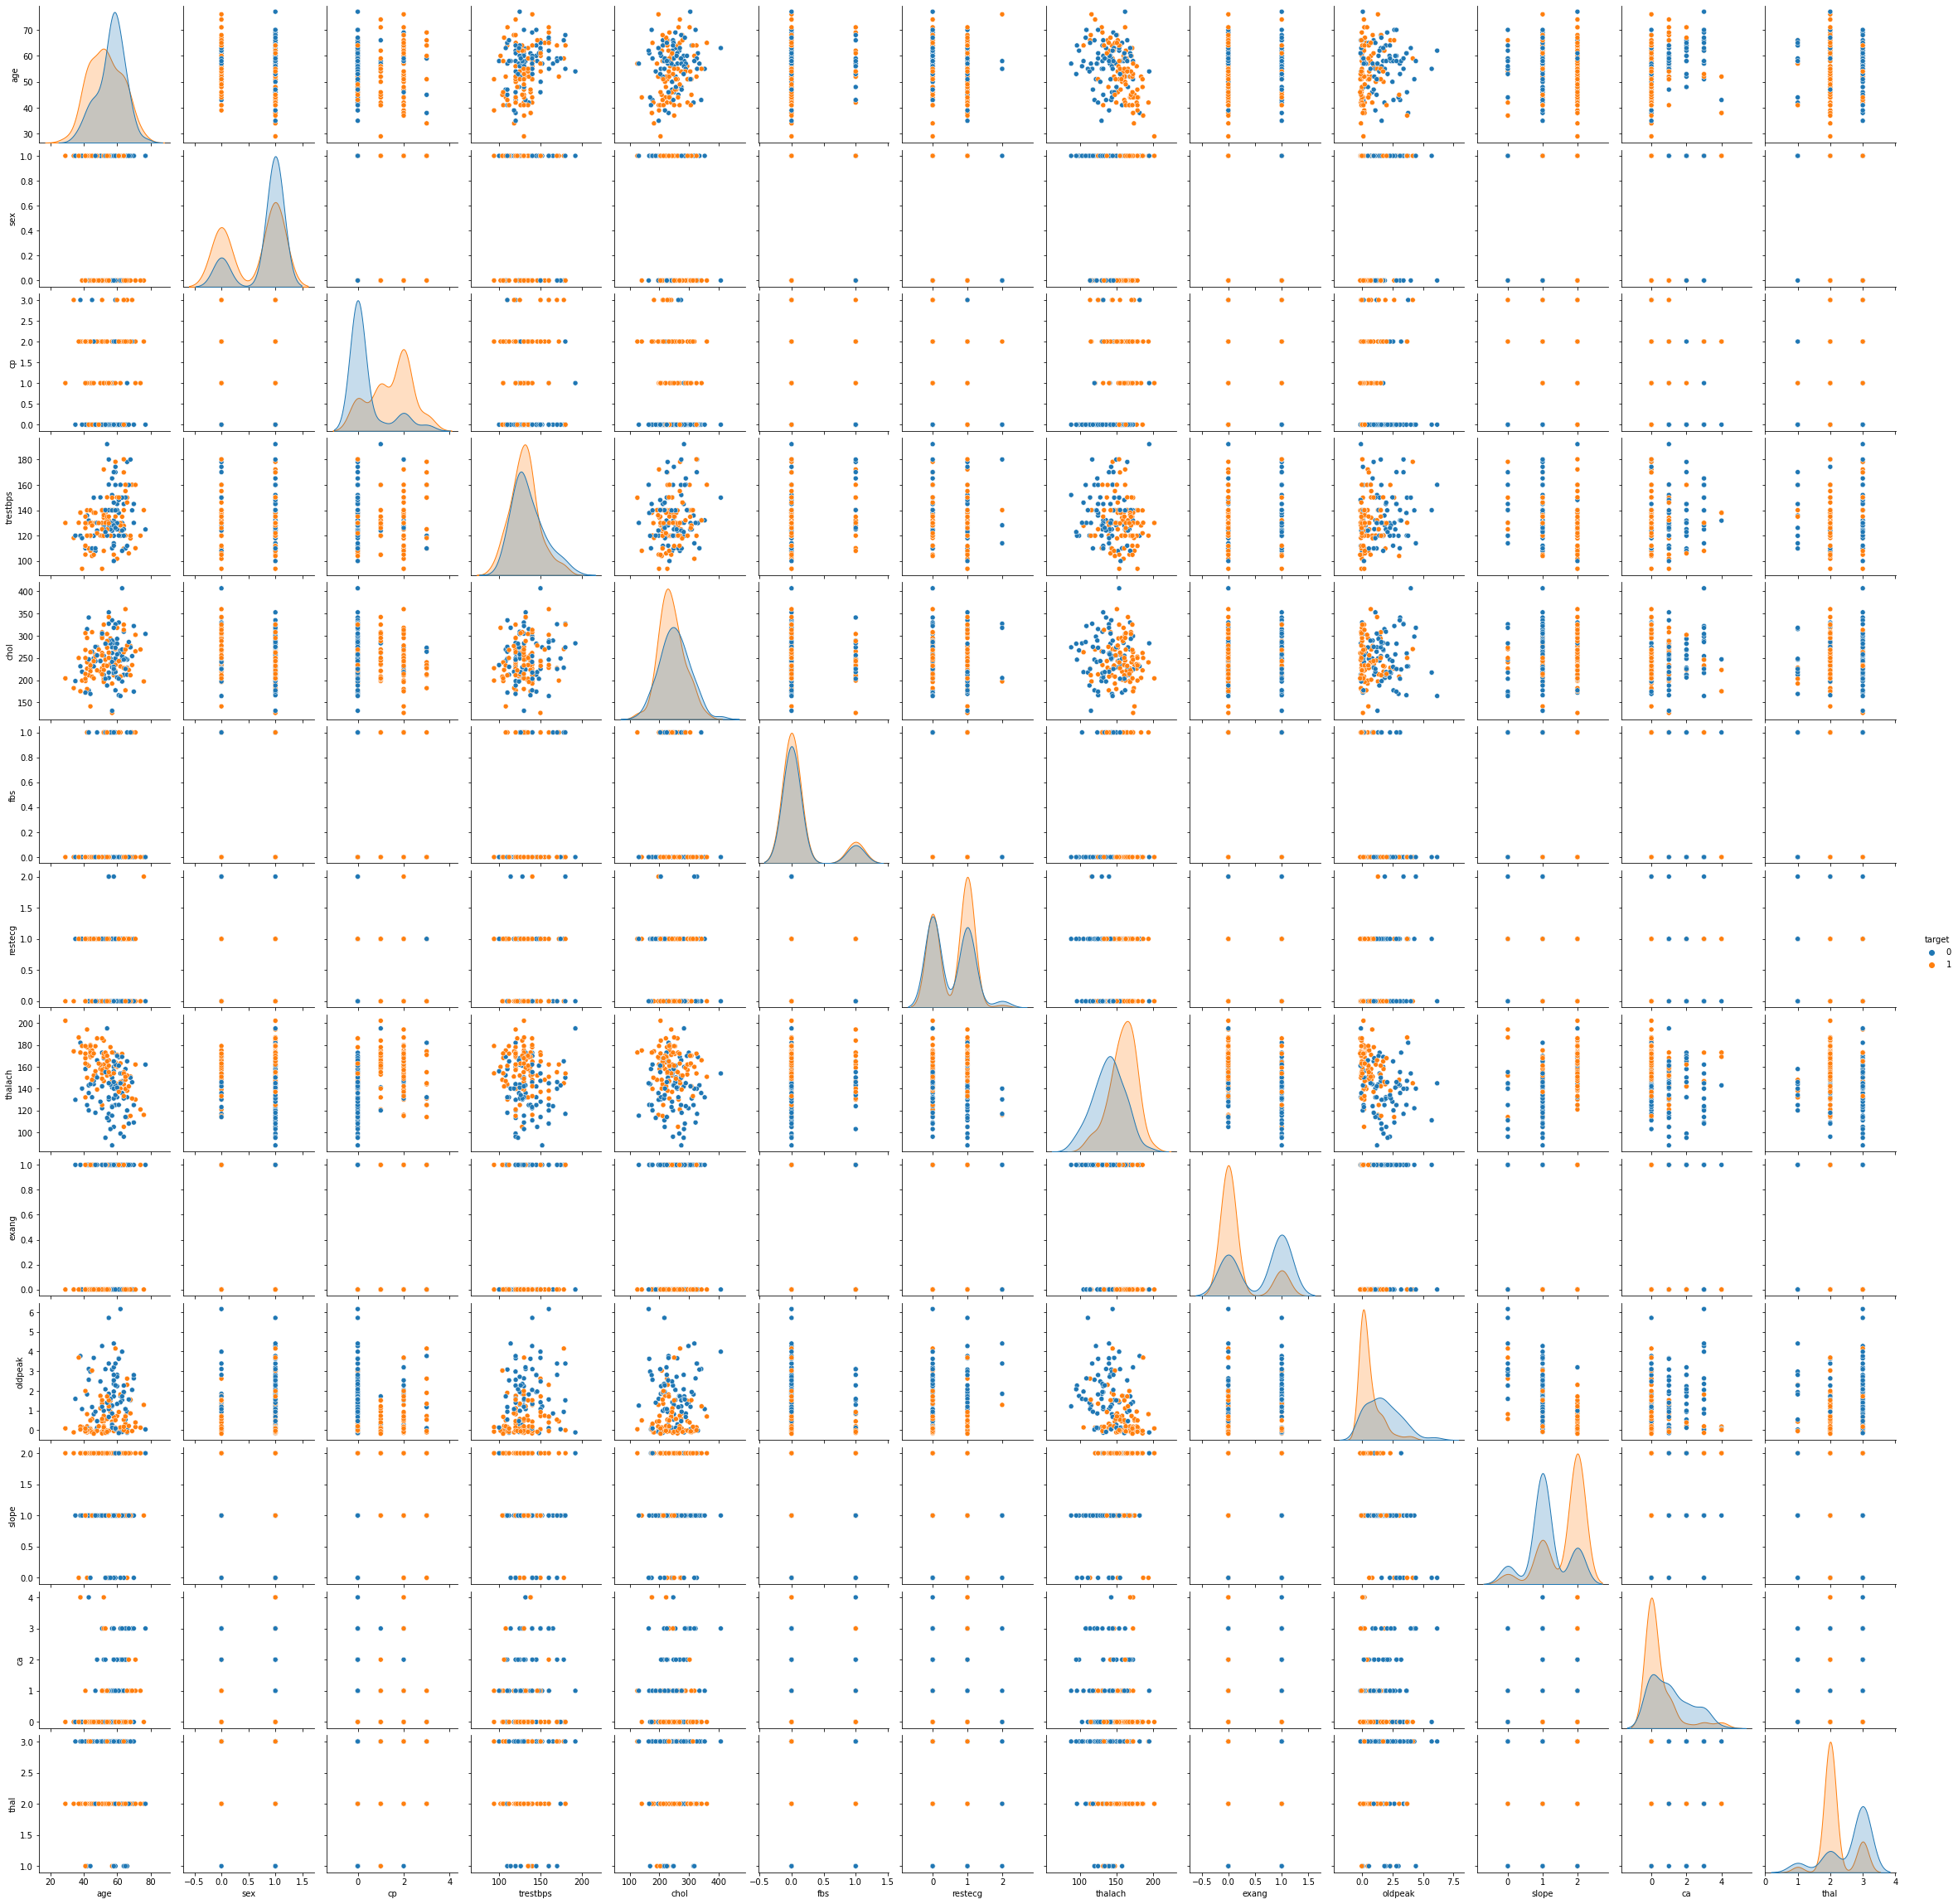

In [21]:
fig1 = plt.figure(figsize=(12,12))
sn = sns.pairplot(heart_df_nona,hue='target', dropna=True)
#sn.savefig("CM1_Heart.png")

In [20]:
heart_df_nona.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.162805 -0.094568  0.311194  0.184968  0.058412   
sex      -0.162805  1.000000 -0.058450 -0.080464 -0.198022  0.047452   
cp       -0.094568 -0.058450  1.000000 -0.008539 -0.078022  0.053333   
trestbps  0.311194 -0.080464 -0.008539  1.000000  0.158249  0.166439   
chol      0.184968 -0.198022 -0.078022  0.158249  1.000000 -0.033144   
fbs       0.058412  0.047452  0.053333  0.166439 -0.033144  1.000000   
restecg  -0.104239 -0.072782 -0.030776 -0.112712 -0.094489 -0.139330   
thalach  -0.418467 -0.051201  0.288617 -0.109834 -0.073405  0.021496   
exang     0.117830  0.090487 -0.396391  0.064888  0.086526  0.075085   
oldpeak   0.132613  0.103859 -0.177998  0.160363  0.073519 -0.081840   
slope    -0.151080 -0.098354  0.184471 -0.175388  0.010260 -0.039972   
ca        0.260586  0.146411 -0.207397  0.072259  0.038942  0.109652   
thal      0.038270  0.227877 -0.169245  0.038510  0.023810  0.040467   
target   -0.177700 -0.249585  0.531465 -0.117806 -0.114501  0.010362   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.104239 -0.418467  0.117830  0.132613 -0.151080  0.260586   
sex      -0.072782 -0.051201  0.090487  0.103859 -0.098354  0.146411   
cp       -0.030776  0.288617 -0.396391 -0.177998  0.184471 -0.207397   
trestbps -0.112712 -0.109834  0.064888  0.160363 -0.175388  0.072259   
chol     -0.094489 -0.073405  0.086526  0.073519  0.010260  0.038942   
fbs      -0.139330  0.021496  0.075085 -0.081840 -0.039972  0.109652   
restecg   1.000000 -0.017183 -0.001014 -0.039762  0.052756 -0.081353   
thalach  -0.017183  1.000000 -0.387369 -0.363022  0.462101 -0.192047   
exang    -0.001014 -0.387369  1.000000  0.262387 -0.327414  0.079687   
oldpeak  -0.039762 -0.363022  0.262387  1.000000 -0.674435  0.156793   
slope     0.052756  0.462101 -0.327414 -0.674435  1.000000 -0.080760   
ca       -0.081353 -0.192047  0.079687  0.156793 -0.080760  1.000000   
thal     -0.016396 -0.136871  0.183732  0.183541 -0.161229  0.104722   
target    0.067840  0.438963 -0.449802 -0.456554  0.427994 -0.307917   

              thal    target  
age       0.038270 -0.177700  
sex       0.227877 -0.249585  
cp       -0.169245  0.531465  
trestbps  0.038510 -0.117806  
chol      0.023810 -0.114501  
fbs       0.040467  0.010362  
restecg  -0.016396  0.067840  
thalach  -0.136871  0.438963  
exang     0.183732 -0.449802  
oldpeak   0.183541 -0.456554  
slope    -0.161229  0.427994  
ca        0.104722 -0.307917  
thal      1.000000 -0.362521  
target   -0.362521  1.000000

In [116]:
#features = ["age",	"sex",	"cp"	,"trestbps",	"chol",	"fbs",	"restecg",	"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal"]	
#features = ["thal","ca","oldpeak","exang","sex"]
features = ["thalach","cp","slope"]	
heart_df = pd.read_csv(path+"\\Heart Disease\\train.csv")
heart_df_sub = heart_df.copy()
for i in heart_df.columns:
    if i not in features and i not in ["target"]:
        heart_df_sub.drop(columns = [i], inplace=True)
heart_df_sub=heart_df_sub.dropna()
thal = [round(x) for x in list(heart_df_sub.loc[:,"thal"].values)]
heart_df_sub["thal"] = thal
heart_df_sub

age    trestbps        chol     thalach  ca  target
0     76  140.102822  197.105970  115.952071   0       1
1     43  132.079599  341.049462  135.970028   0       0
2     47  107.899290  242.822816  152.210039   0       0
4     57  110.103508  334.952353  143.099327   1       0
6     63  134.926653  252.023252  171.840974   0       1
..   ...         ...         ...         ...  ..     ...
206   58  170.013760  225.087305  146.001338   2       0
208   57  127.981407  302.985611  158.992132   1       1
209   54  150.188534  232.117551  164.977674   0       1
210   41  129.918793  214.008059  167.851493   0       1
211   41  112.075764  268.005496  172.008896   0       1

[192 rows x 6 columns]

In [117]:
heart_df_X = heart_df_sub.copy().drop(columns=["target"])
heart_df_Y = heart_df_sub.copy().drop(columns=features)

In [118]:
heart_df_X_norm = heart_df_X.copy()
for i in heart_df_X.columns:
    heart_df_X_norm[i] = (heart_df_X.loc[:,i] - heart_df_X.describe().loc['mean',i])/heart_df_X.describe().loc['std',i]
heart_df_Y_norm = heart_df_Y.copy()
heart_df_X_norm.describe()

age      trestbps          chol       thalach          ca
count  1.920000e+02  1.920000e+02  1.920000e+02  1.920000e+02  192.000000
mean  -2.636780e-16  4.903485e-16 -9.251859e-18  4.764707e-16    0.000000
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000
min   -2.738207e+00 -2.086494e+00 -2.575075e+00 -2.770592e+00   -0.705263
25%   -8.172910e-01 -6.553055e-01 -7.039920e-01 -6.200600e-01   -0.705263
50%    7.552896e-02 -1.048864e-01 -6.484747e-02  9.772705e-02   -0.705263
75%    7.248526e-01  4.485577e-01  6.213082e-01  7.266918e-01    0.235088
max    2.456382e+00  3.306973e+00  3.535015e+00  2.350800e+00    3.056139

In [119]:
def norma(df, train_df):
    df_2 = df.copy()
    for i in df.columns:
        df_2[i] = (df.loc[:,i] - train_df.describe().loc['mean',i])/train_df.describe().loc['std',i]
    return df_2
heart_df_X_norm_2 = norma(heart_df_X,heart_df_X)
heart_df_X_norm_2.describe()

age      trestbps          chol       thalach          ca
count  1.920000e+02  1.920000e+02  1.920000e+02  1.920000e+02  192.000000
mean  -2.636780e-16  4.903485e-16 -9.251859e-18  4.764707e-16    0.000000
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000
min   -2.738207e+00 -2.086494e+00 -2.575075e+00 -2.770592e+00   -0.705263
25%   -8.172910e-01 -6.553055e-01 -7.039920e-01 -6.200600e-01   -0.705263
50%    7.552896e-02 -1.048864e-01 -6.484747e-02  9.772705e-02   -0.705263
75%    7.248526e-01  4.485577e-01  6.213082e-01  7.266918e-01    0.235088
max    2.456382e+00  3.306973e+00  3.535015e+00  2.350800e+00    3.056139

Best K is... 18


KNeighborsClassifier(n_neighbors=18, weights='distance')

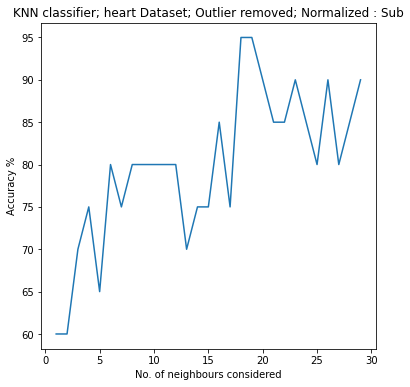

In [120]:
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(heart_df_X_norm, heart_df_Y_norm, test_size = 0.1, random_state=275)
#X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k,weights='distance', metric = 'minkowski', p=2)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; heart Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))+1
print('Best K is...', best_k)
knn_model = KNeighborsClassifier(n_neighbors=best_k,weights='distance', metric = 'minkowski', p=2)
knn_model.fit(X_train,Y_train)


In [121]:
heart_df_test = pd.read_csv(path+"\\Heart Disease\\test.csv")
heart_pred_old = heart_pred_df.copy()
heart_df_test_2 = heart_df_test.copy()
for i in heart_df_test.columns:
    if i not in features:
        heart_df_test_2.drop(columns = [i], inplace=True)

heart_df_test_norm = norma(heart_df_test_2, heart_df_X)
heart_pred_df = heart_df_test.copy()
cols = heart_pred_df.columns
for i in cols:
    if i not in ["id"]:
        heart_pred_df.drop(columns=[i],inplace=True)
heart_pred_df["target"] = knn_model.predict(heart_df_test_norm)
heart_pred_df.to_csv(path+"\\Heart Disease\\pred.csv", index = False)